In [84]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler
from joblib import dump

In [85]:
df_data = pd.read_csv("../../results/3_data_coded.csv")
df_data.head(5)

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,formerly smoked,never smoked,smokes,Unknown,children,Govt_job,Never_worked,Private,Self-employed
0,67.0,0,1,1,1,228.69,36.600000,1,0,1,1,0,0,0,0,0,0,1,0
1,61.0,0,0,1,0,202.21,28.893237,1,1,0,0,1,0,0,0,0,0,0,1
2,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,1,0,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,0,1,0,0,0,0,1,0
4,79.0,1,0,1,0,174.12,24.000000,1,1,0,0,1,0,0,0,0,0,0,1


In [86]:
df_data["stroke"].value_counts()

stroke
0    4737
1     246
Name: count, dtype: int64

<Axes: xlabel='avg_glucose_level'>

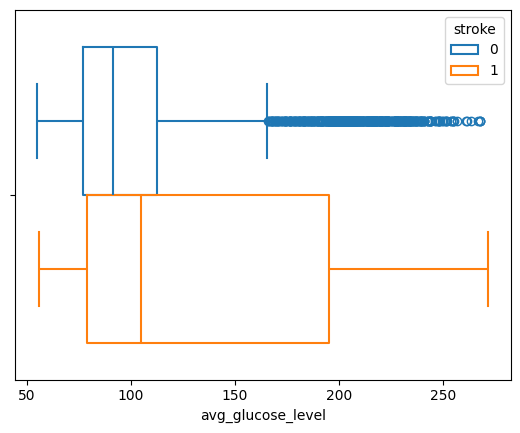

In [87]:
sns.boxplot(data=df_data, x="avg_glucose_level", hue="stroke", fill=False)

In [88]:
df_data_positive = df_data[df_data["stroke"] == 1]
df_data_negative = df_data[df_data["stroke"] == 0]

In [89]:
df_data_negative = shuffle(df_data_negative, random_state=42)

In [90]:
df_data_negative_filter = df_data_negative[:len(df_data_positive)]
df_data_negative_filter2 = df_data_negative[len(df_data_positive):]


In [91]:
df_data_negative_filter2.to_csv("../../results/4_testing_negatives.csv", index=False)

In [92]:
df_data_for_training = pd.concat([df_data_positive, df_data_negative_filter], axis=0)
df_data_for_training.shape

(492, 19)

In [93]:
X_train, X_test = train_test_split(df_data_for_training, test_size=.1, random_state=42)
X_test.shape

(50, 19)

In [94]:
X_test.to_csv("../../results/4_testing_mix.csv", index=False)

In [95]:
response = X_train["stroke"]
X_values = X_train.drop(columns=["stroke"])

In [96]:
X_values_to_standardize = X_values[["age", "avg_glucose_level", "bmi"]]
X_values_no_standardize = X_values.drop(columns=["age", "avg_glucose_level", "bmi"])
X_values_to_standardize

,age,avg_glucose_level,bmi
3410,61.0,75.46,29.3
90,57.0,68.02,37.5
258,40.0,95.04,42.4
39,78.0,78.03,23.9
4617,78.0,67.90,35.3
...,...,...,...
106,79.0,93.05,24.2
3407,44.0,58.19,37.1
4433,16.0,135.82,35.1
423,62.0,180.63,31.8


In [97]:
scaler_instance = MaxAbsScaler()
scaler_instance.fit(X_values_to_standardize.values)
X_values_to_standardize_scaler = scaler_instance.transform(X_values_to_standardize.values)

In [98]:
X_scaler = pd.DataFrame(data=X_values_to_standardize_scaler, columns=X_values_to_standardize.columns)
X_scaler

,age,avg_glucose_level,bmi
0,0.743902,0.277692,0.634199
1,0.695122,0.250313,0.811688
2,0.487805,0.349746,0.917749
3,0.951220,0.287149,0.517316
4,0.951220,0.249871,0.764069
...,...,...,...
437,0.963415,0.342423,0.523810
438,0.536585,0.214139,0.803030
439,0.195122,0.499816,0.759740
440,0.756098,0.664716,0.688312


In [99]:
X_values_no_standardize.shape

(442, 15)

In [100]:
X_scaler

,age,avg_glucose_level,bmi
0,0.743902,0.277692,0.634199
1,0.695122,0.250313,0.811688
2,0.487805,0.349746,0.917749
3,0.951220,0.287149,0.517316
4,0.951220,0.249871,0.764069
...,...,...,...
437,0.963415,0.342423,0.523810
438,0.536585,0.214139,0.803030
439,0.195122,0.499816,0.759740
440,0.756098,0.664716,0.688312


In [101]:
X_values_no_standardize = X_values_no_standardize.reset_index()
X_values_no_standardize = X_values_no_standardize.drop(columns=["index"])

In [102]:
X_train = pd.concat([X_scaler, X_values_no_standardize], axis=1)

In [103]:
X_train

,age,avg_glucose_level,bmi,hypertension,heart_disease,ever_married,Residence_type,Female,Male,formerly smoked,never smoked,smokes,Unknown,children,Govt_job,Never_worked,Private,Self-employed
0,0.743902,0.277692,0.634199,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1
1,0.695122,0.250313,0.811688,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
2,0.487805,0.349746,0.917749,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,0.951220,0.287149,0.517316,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
4,0.951220,0.249871,0.764069,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.963415,0.342423,0.523810,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
438,0.536585,0.214139,0.803030,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
439,0.195122,0.499816,0.759740,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0
440,0.756098,0.664716,0.688312,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1


In [104]:
X_train["stroke"] = response.values
X_train["stroke"].value_counts()

stroke
0    224
1    218
Name: count, dtype: int64

In [105]:
X_train.to_csv("../../results/4_train_dataset.csv", index=False)

In [106]:
dump(scaler_instance, "../../results/scaler_process.joblib")

['../../results/scaler_process.joblib']